In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon/amazon_reviews.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = pd.read_csv('/kaggle/input/amazon/amazon_reviews.csv')
data.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4913 entries, 1 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4913 non-null   int64  
 1   reviewerName          4913 non-null   object 
 2   overall               4913 non-null   float64
 3   reviewText            4913 non-null   object 
 4   reviewTime            4913 non-null   object 
 5   day_diff              4913 non-null   int64  
 6   helpful_yes           4913 non-null   int64  
 7   helpful_no            4913 non-null   int64  
 8   total_vote            4913 non-null   int64  
 9   score_pos_neg_diff    4913 non-null   int64  
 10  score_average_rating  4913 non-null   float64
 11  wilson_lower_bound    4913 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 499.0+ KB


In [7]:
data['overall'].value_counts()

5.0    3921
4.0     526
1.0     244
3.0     142
2.0      80
Name: overall, dtype: int64

In [8]:
#1,2,3->negative(i.e 0)
data.loc[data['overall']<=3.0,'overall'] = 0
 
#4,5->positive(i.e 1)
data.loc[data['overall']>3.0,'overall'] = 1

In [9]:
data['overall'].value_counts()

1.0    4447
0.0     466
Name: overall, dtype: int64

In [10]:
stp_words=stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.split() if word not in stp_words)
  return cleanreview
 
data['reviewText']=data['reviewText'].apply(clean_review)

In [11]:
data.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
1,1,0mie,1.0,"Purchased device, worked advertised. You never...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,1.0,works expected. I sprung higher capacity. I th...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,1.0,This think worked great.Had diff. bran 64gb ca...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,1.0,"Bought Retail Packaging, arrived legit, orange...",2013-07-13,513,0,0,0,0,0.0,0.0
5,5,2Cents!,1.0,It's mini storage. It anything else supposed t...,2013-04-29,588,0,0,0,0,0.0,0.0


In [12]:
data['overall'].value_counts()

1.0    4447
0.0     466
Name: overall, dtype: int64

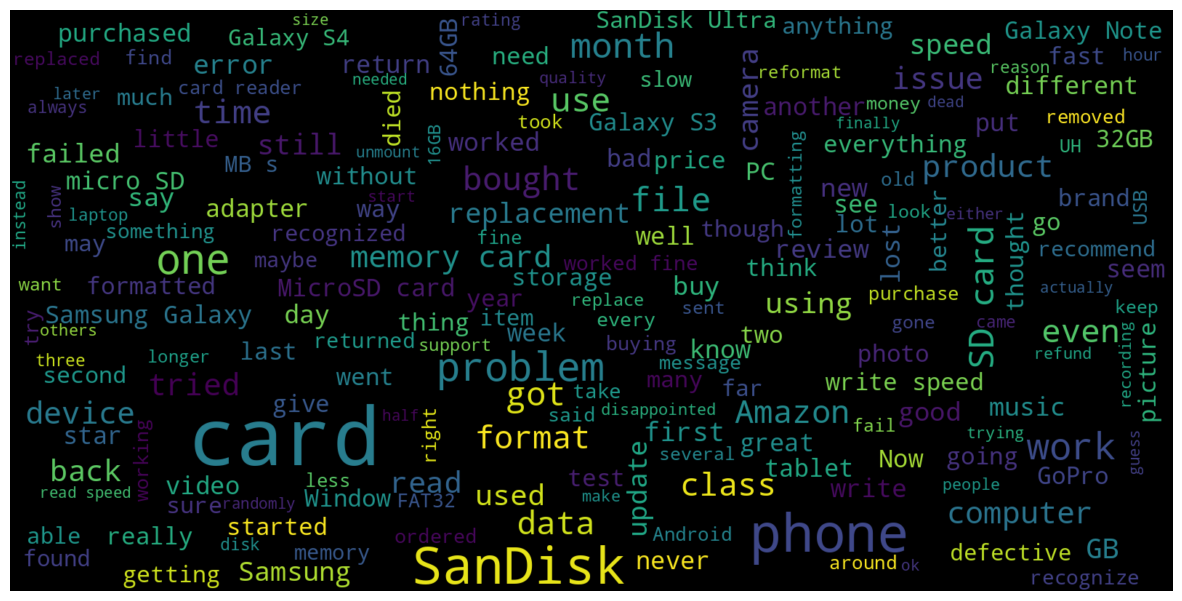

In [13]:
consolidated=' '.join(word for word in data['reviewText'][data['overall']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

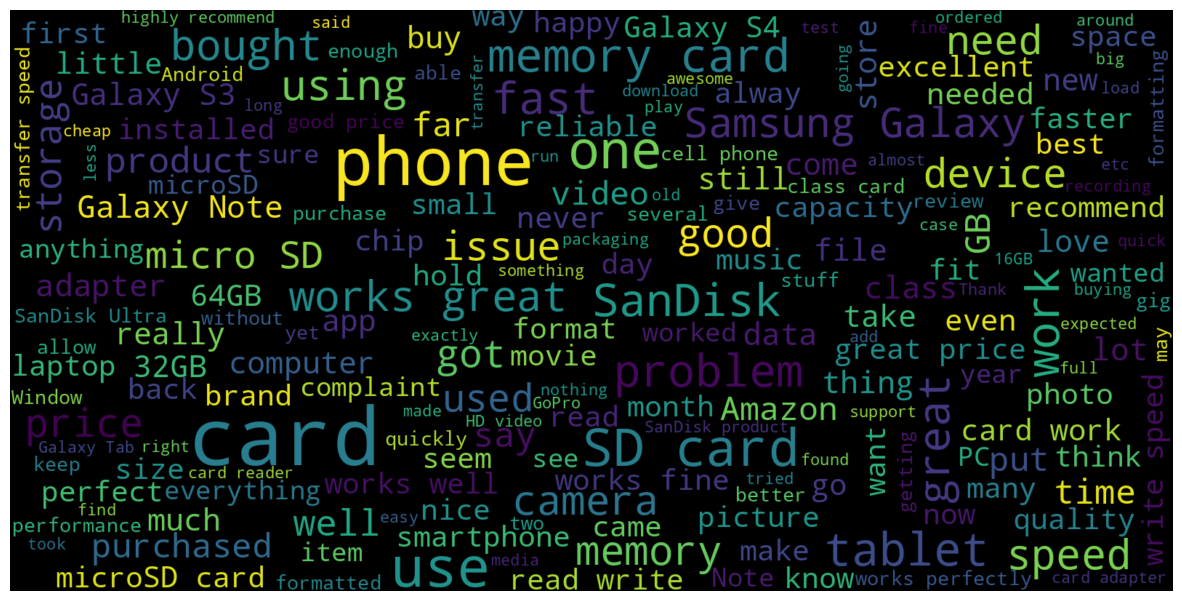

In [14]:
consolidated=' '.join(word for word in data['reviewText'][data['overall']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['reviewText'] ).toarray()

In [16]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['overall'],
                                                test_size=0.25 ,
                                                random_state=42)

In [17]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
 
#Model fitting
model.fit(x_train,y_train)
 
#testing the model
pred=model.predict(x_test)
 
#model accuracy
score=metrics.accuracy_score(y_test,pred)
print(score)

0.9104963384865744


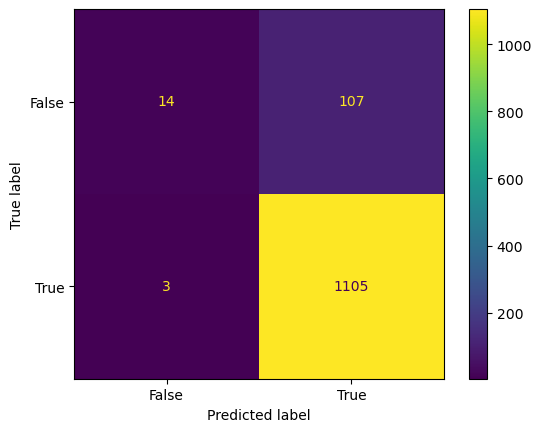

In [18]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,pred)
 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [False, True])
 
cm_display.plot()
plt.show()